# Imports

In [33]:
import numpy as np
import os
import sys
import pickle
import scipy
import networkx as nx
import matplotlib.pyplot as plt

In [50]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import atlasMapping
import fixedDensity as fd

# Set Directory Paths

In [96]:
graphDir_path = f'{os.path.dirname(os.getcwd())}/Pathology_Analysis/Graphs'
graphDir_volWscore = f'{os.path.dirname(os.getcwd())}/Thickness_At_Pathology_Analysis/Graphs'
stochastic_dir = f'{os.path.dirname(os.getcwd())}/Thickness_At_Pathology_Analysis/Stochastic_Results'

In [35]:
# Directory path to load preconstructed Atlas Data
%store -r baseDir

# Directory path to load formatted Pathology Data
%store -r path_dataDir
# Directory path to save Calcualted Analysis Data - Pathology
%store -r path_CalData

# Directory path to load formatted Thickness At Path Data
%store -r thickAtPath_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thickAtPath_CalData
# Directory path to save Figures
%store -r thickAtPath_Fig

# Loading

## Loading the preconstructed atlas data

In [36]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Loading Pathology Labels (TAU, TDP) - Dropped

In [60]:
# LabelNames
with open(os.path.join(path_CalData, 'LabelNames.pkl'), 'rb') as f:
    LabelNames = pickle.load(f)
f.close()

# pathNames_TAU_Drop
with open(os.path.join(path_CalData, 'pathNames_TAU_Drop.pkl'), 'rb') as f:
    pathNames_TAU_Drop = pickle.load(f)
f.close()

# pathNames_TDP_Drop
with open(os.path.join(path_CalData, 'pathNames_TDP_Drop.pkl'), 'rb') as f:
    pathNames_TDP_Drop = pickle.load(f)
f.close()

## Volume At Path Covariance Matrices - Dictionaries (W Score) / TAU, TDP --> Dropped

In [51]:
# cov_volAtPath_w_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_w_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_w_dict_Drop = pickle.load(f)
f.close()

## Loading pathCoM (TAU, TDP) - Dropped

In [37]:
# pathCoM
with open(os.path.join(path_dataDir, 'pathCoM.pkl'), 'rb') as f:
    pathCoM = pickle.load(f)
f.close()

pathCoM = np.vstack((pathCoM[:, :, 0], pathCoM[:, :, 1]))

# CoM_TAU_Drop
with open(os.path.join(path_dataDir, 'CoM_TAU_Drop.pkl'), 'rb') as f:
    CoM_TAU_Drop = pickle.load(f)
f.close()

# CoM_TDP_Drop
with open(os.path.join(path_dataDir, 'CoM_TDP_Drop.pkl'), 'rb') as f:
    CoM_TDP_Drop = pickle.load(f)
f.close()

## Loading Thickness Values (Original) at Pathology Regions / TAU, TDP --> Dropped

In [54]:
# HCthicknessAtPath
with open(os.path.join(thickAtPath_dataDir, 'HCthicknessAtPath.pkl'), 'rb') as f:
    HCthicknessAtPath = pickle.load(f)
f.close()

# TAUthicknessAtPath_Drop
with open(os.path.join(thickAtPath_dataDir, 'TAUthicknessAtPath_Drop.pkl'), 'rb') as f:
    TAUthicknessAtPath_Drop = pickle.load(f)
f.close()

# TDPthicknessAtPath_Drop
with open(os.path.join(thickAtPath_dataDir, 'TDPthicknessAtPath_Drop.pkl'), 'rb') as f:
    TDPthicknessAtPath_Drop = pickle.load(f)
f.close()

## Loading Volume at Pathology Regions - W Score / TAU, TDP --> Dropped

In [55]:
# HCVolumeAtPath_w
with open(os.path.join(thickAtPath_CalData, 'HCVolumeAtPath_w.pkl'), 'rb') as f:
    HCVolumeAtPath_w = pickle.load(f)
f.close()

# TAUVolumeAtPath_w_Drop
with open(os.path.join(thickAtPath_CalData, 'TAUVolumeAtPath_w_Drop.pkl'), 'rb') as f:
    TAUVolumeAtPath_w_Drop = pickle.load(f)
f.close()

# TDPVolumeAtPath_w_Drop
with open(os.path.join(thickAtPath_CalData, 'TDPVolumeAtPath_w_Drop.pkl'), 'rb') as f:
    TDPVolumeAtPath_w_Drop = pickle.load(f)
f.close()

## Pathology

In [38]:
# TAU_gt_TDP_Graph(Pathology)
with open(os.path.join(graphDir_path, 'TAU_gt_TDP_Graph(Pathology).pickle'), 'rb') as f:
    TAU_gt_TDP_Path_Graph = pickle.load(f)
f.close()

# TDP_gt_TAU_Graph(Pathology)
with open(os.path.join(graphDir_path, 'TDP_gt_TAU_Graph(Pathology).pickle'), 'rb') as f:
    TDP_gt_TAU_Path_Graph = pickle.load(f)
f.close()

# TAU_gt_TDP_Graph(Pathology)(FD)
with open(os.path.join(graphDir_path, 'TAU_gt_TDP_Graph(Pathology)(FD).pickle'), 'rb') as f:
    TAU_gt_TDP_Path_Graph_FD = pickle.load(f)
f.close()

# TDP_gt_TAU_Graph(Pathology)(FD)
with open(os.path.join(graphDir_path, 'TDP_gt_TAU_Graph(Pathology)(FD).pickle'), 'rb') as f:
    TDP_gt_TAU_Path_Graph_FD = pickle.load(f)
f.close()

## Volume WScore

In [39]:
# TAU_gt_TDP_Graph(Vol_WScore)
with open(os.path.join(graphDir_volWscore, 'TAU_gt_TDP_Graph(Vol_WScore).pickle'), 'rb') as f:
    TAU_gt_TDP_VolW_Graph = pickle.load(f)
f.close()

# TDP_gt_TAU_Graph(Vol_WScore)
with open(os.path.join(graphDir_volWscore, 'TDP_gt_TAU_Graph(Vol_WScore).pickle'), 'rb') as f:
    TDP_gt_TAU_VolW_Graph = pickle.load(f)
f.close()

# TAU_gt_TDP_Graph(Vol_WScore)(FD)
with open(os.path.join(graphDir_volWscore, 'TAU_gt_TDP_Graph(Vol_WScore)(FD).pickle'), 'rb') as f:
    TAU_gt_TDP_VolW_Graph_FD = pickle.load(f)
f.close()

# TDP_gt_TAU_Graph(Vol_WScore)(FD)
with open(os.path.join(graphDir_volWscore, 'TDP_gt_TAU_Graph(Vol_WScore)(FD).pickle'), 'rb') as f:
    TDP_gt_TAU_VolW_Graph_FD = pickle.load(f)
f.close()



# Helper Funcions (Graph Drawing)

In [107]:
def stochasticGraph(G, CoM, labelNames, title, showLabels=0, node_color = None):
    covType='sig'
    nodeTransparency = 0.3
    edgeTransparency = 0.8
    atlasTransparency = 0.01
    


    # colorVec = colorVecVolTDP
    # markerVec = markerVecVolTDP

    ##################################
    # Define figure
    fig = plt.figure()

    # Define GII
    GIImesh = NetworkDataGeneral['NetworkDataGeneral'][0, 0]['Schaefer400x7']['GII'][0, 0]

    # Define surfLabels and surfval
    surfLabels = GIImesh['cdata'][0, 0]
    surfval = GIImesh['cdata'][0, 0]
    surfvalDisp = np.zeros_like(surfval)

    for v in range(2):
        # Get the plt subplot using v(1st, 2nd row) 
        currAx = fig.add_subplot(2, 1, v+1, projection='3d')

        # Set the 3D view angle
        if v == 0:
            viewE = 15
            viewA = 180
            viewR = 0
        elif v == 1:
            viewE = 90
            viewA = -90
            viewR = 0
        
        # Set camera angle
        currAx.view_init(viewE, viewA, viewR)

        # Create a dictionary of node positions (Center of Mass) from the CoM array
        pos = {n: CoM[i] for i, n in enumerate(G.nodes())}

        # Extract node and edge positions from the layout
        node_xyz = np.array([pos[v] for v in sorted(G)])
        edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

        # Plot the nodes
        if node_color is None:
            currAx.scatter(*node_xyz.T, s=10, c = 'red', alpha=nodeTransparency)
        else:
            currAx.scatter(*node_xyz.T, s=10, c = node_color, alpha=nodeTransparency)

        # Plot the edges
        for i, vizedge in enumerate(edge_xyz):
            if covType == 'sig':
    #                 colors = 'green'
                colors = 'royalblue'

            currAx.plot(*vizedge.T, c=colors, alpha = edgeTransparency)

        # Plot the Labels
        if showLabels:
            for i in range(len(labelNames)):
                currAx.text(x=pos[i][0], y=pos[i][1], z=pos[i][2], s=labelNames[i], fontsize = 6)
        else:
            pass

        # Plot the 3D Brain surface (Atlas)
        giiSurf = GIImesh['giiSurface_Both'][0,0]
        # Set Box aspect
        currAx.set_box_aspect([np.ptp(giiSurf['vertices'][0, 0][:, 0]), np.ptp(giiSurf['vertices'][0, 0][:, 1]), 
                                np.ptp(giiSurf['vertices'][0, 0][:, 2])])

        
        plt.axis('off') # Get rid of axis # Also Get rid of grid and also ticks - Both Rows
        plt.tight_layout() # Makes the mapping tighter --> Bigger

    plt.axis('equal')

    # TITLE
    plt.suptitle(title)

    # Save the figure
    plt.savefig(stochastic_dir + f'/{title}.png', dpi=1000, bbox_inches='tight')

    # Show Figure
    plt.show()

# Draw original Fixed Density Graphs

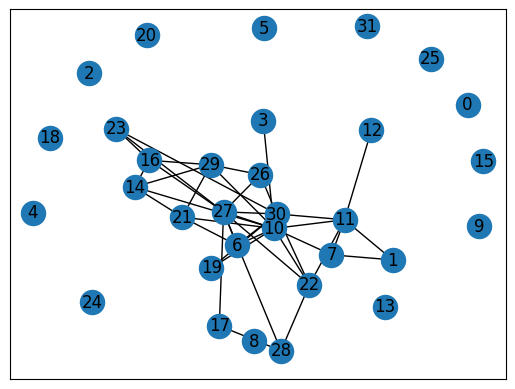

In [108]:
nx.draw_networkx(TAU_gt_TDP_VolW_Graph_FD)

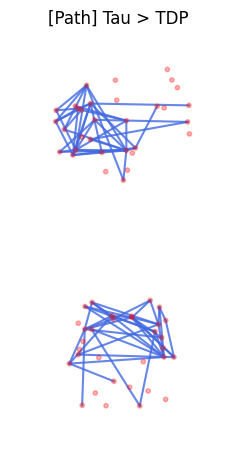

In [116]:
stochasticGraph(TAU_gt_TDP_Path_Graph_FD, CoM_TAU_Drop, pathNames_TAU_Drop, '[Path] Tau > TDP')

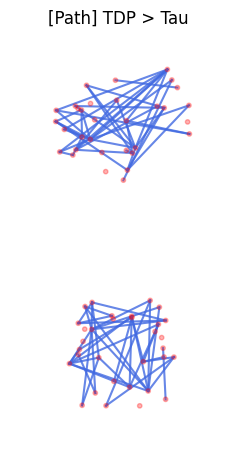

In [110]:
stochasticGraph(TDP_gt_TAU_Path_Graph_FD, CoM_TDP_Drop, pathNames_TDP_Drop, '[Path] TDP > Tau')

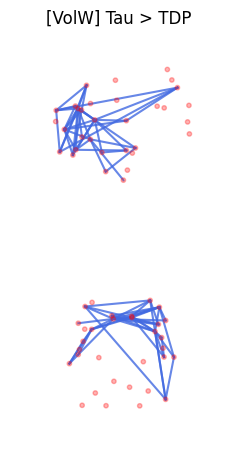

In [111]:
stochasticGraph(TAU_gt_TDP_VolW_Graph_FD, CoM_TAU_Drop, pathNames_TAU_Drop, '[VolW] Tau > TDP')

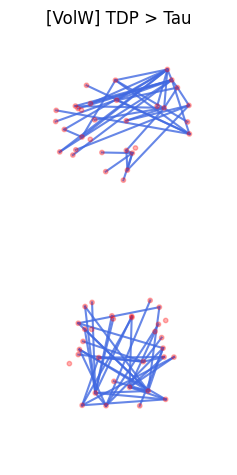

In [112]:
stochasticGraph(TDP_gt_TAU_VolW_Graph_FD, CoM_TDP_Drop, pathNames_TDP_Drop, '[VolW] TDP > Tau')

# Stochastic Block Model

In [113]:
import pysbm
import networkx as nx
import matplotlib.pylab as plt

## Pathology Tau > TDP

In [120]:
graph = TAU_gt_TDP_Path_Graph_FD

standard_partition = pysbm.NxPartition(
    graph=graph, 
    number_of_blocks=2)

degree_corrected_partition = pysbm.NxPartition(
    graph=graph, 
    number_of_blocks=2,
    representation=standard_partition.get_representation())

standard_objective_function = pysbm.TraditionalUnnormalizedLogLikelyhood(is_directed=False)
degree_corrected_objective_function = pysbm.DegreeCorrectedUnnormalizedLogLikelyhood(is_directed=False)

In [122]:
standard_inference = pysbm.MetropolisHastingInference(graph, standard_objective_function, standard_partition)
degree_corrected_inference = pysbm.MetropolisHastingInference(graph, degree_corrected_objective_function, degree_corrected_partition)

In [124]:
standard_inference.infer_stochastic_block_model()
#degree_corrected_inference.infer_stochastic_block_model()

IndexError: Cannot choose from an empty sequence

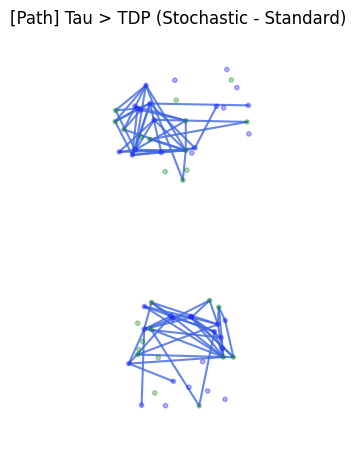

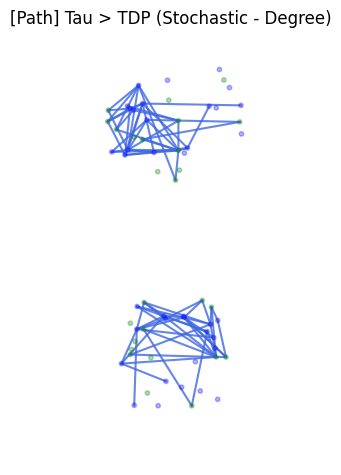

In [118]:
node_color_standard=['g' if standard_partition.get_block_of_node(node) == 0 else 'b' for node in graph]
stochasticGraph(TAU_gt_TDP_Path_Graph_FD, CoM_TAU_Drop, pathNames_TAU_Drop, '[Path] Tau > TDP (Stochastic - Standard)', node_color=node_color_standard)

node_color_degree=['g' if degree_corrected_partition.get_block_of_node(node) == 0 else 'b' for node in graph]
stochasticGraph(TAU_gt_TDP_Path_Graph_FD, CoM_TAU_Drop, pathNames_TAU_Drop, '[Path] Tau > TDP (Stochastic - Degree)', node_color=node_color_degree)